<h1>Deep Learning in Computer Vision</h1>


#### Load Dataset

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

##### Visualize Dataset

In [11]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : 7')

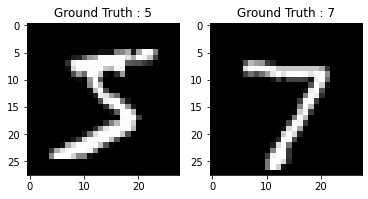

In [12]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

#### Process the data

In [13]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [14]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [15]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Create a Model 

In [16]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

#### Configure Model

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train Model

In [18]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/5
235/235 [==============================] - 2s 9ms/step - loss: 0.2722 - accuracy: 0.9148 - val_loss: 0.1333 - val_accuracy: 0.9582
Epoch 2/5
235/235 [==============================] - 2s 8ms/step - loss: 0.0940 - accuracy: 0.9704 - val_loss: 0.1045 - val_accuracy: 0.9679
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.0744 - val_accuracy: 0.9766
Epoch 4/5
235/235 [==============================] - 2s 9ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0721 - val_accuracy: 0.9795
Epoch 5/5
235/235 [==============================] - 2s 9ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0607 - val_accuracy: 0.9828


#### Evaluate Model

In [19]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9828
Evaluation result on Test Data : Loss = 0.06066329404711723, accuracy = 0.9828000068664551


#### Get Prediction

In [20]:
model.predict(test_data[[0],:])

array([[6.7031891e-10, 3.8479985e-07, 1.3093343e-07, 7.6028726e-07,
        4.0316871e-11, 1.3976782e-08, 3.8490915e-13, 9.9999869e-01,
        1.4053629e-09, 9.0137895e-08]], dtype=float32)

#### Discussion

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Loss Curves')

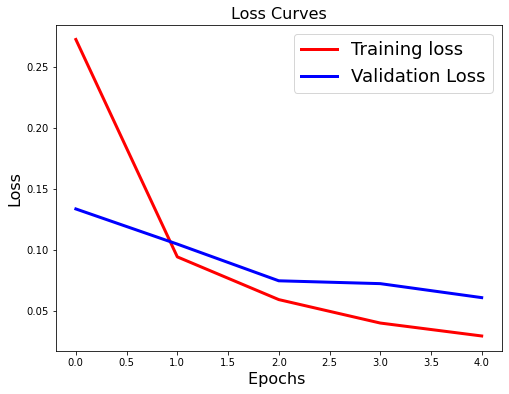

In [22]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

### Regularization

#### Overfitting

[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/loss-curve-without-reg.png)
[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/acc-curve-without-reg.png)
<table align="center">
<tr>
<td> <img src="elements/images/applications/loss-curve-without-reg.png" alt="RE" align="middle" style="width: 400px;"/></td>
<td> <img src="elements/images/applications/acc-curve-without-reg.png" alt="RE" align="middle" style="width: 400px;"/> </td>
</tr>
</table>

* The validation loss is increasing
* The difference between the train and validation accuracy is very high

[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/loss-curve-with-reg.png)
[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/acc-curve-with-reg.png)
<table align="center">
<tr>
<td> <img src="elements/images/applications/loss-curve-with-reg.png" alt="RE" align="middle" style="width: 400px;"/></td>
<td> <img src="elements/images/applications/acc-curve-with-reg.png" alt="RE" align="middle" style="width: 400px;"/> </td>
</tr>
</table>

#### Dropout

[//]: <> (REF: http://everglory99.github.io/Intro_DL_TCC/intro_dl_images/dropout1.png)
<img src="elements/images/applications/dropout1.png" alt="DR" align="middle" style="width: 1100px;"/>

keras.layers.Dropout(rate, noise_shape=None, seed=None)

More: http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

#### Lp-Norm

[//]: <> (REF: https://www.researchgate.net/profile/Younghak_Shin2/publication/230633149/figure/fig7/AS:300644943581190@1448690748255/Figure-9-L1-and-L2-norm-minimization.png)
<img src="elements/images/applications/Figure-9-L1-and-L2-norm-minimization.png" alt="LPNORM" align="middle" style="width: 600px;"/>

[//]: <> (REF: https://www.youtube.com/watch?v=sO4ZirJh9ds)
<img src="elements/images/applications/regu.png" alt="LPNORM" align="middle" style="width: 600px;"/>

* kernel_regularizer: Regularizer function applied to the kernel weights matrix
* bias_regularizer: Regularizer function applied to the bias vector
* activity_regularizer: Regularizer function applied to the output of the layer (its "activation")

keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

In [23]:
from keras import regularizers

* keras.regularizers.l1(0.)
* keras.regularizers.l2(0.)
* keras.regularizers.l1_l2(0.)

## Concepts and Techniques

### Convolutions

[//]: <> (REF: https://i.stack.imgur.com/SFST9.gif)
[//]: <> (REF: https://cdn-images-1.medium.com/max/1600/1*1VJDP6qDY9-ExTuQVEOlVg.gif)
<table align="center">
<tr>
<td> <img src="elements/images/applications/SFST9.gif" alt="CONV" align="middle" style="width: 400px;"/> </td>
<td> <img src="elements/images/applications/conv.gif" alt="CONV" align="middle" style="width: 300px;"/> </td>
</tr>
</table>


### Auto-Encoders

[//]: <> (REF: https://siavashk.github.io/assets/ae1.jpg)
<img src="elements/images/applications/ae1.jpg" alt="AE" align="middle" style="width: 800px;"/>

<h5>Why AutoEncoders?</h5>
    1. Many Algorithms works well only in Low Dimensional Cases
    2. Huge efforts need to provide annotated examples
    3. AutoEncoders are great for reconstruction

[//]: <> (REF: https://cdn-images-1.medium.com/max/1600/1*8ixTe1VHLsmKB3AquWdxpQ.png)
<img src="elements/images/applications/1-8ixTe1VHLsmKB3AquWdxpQ.png" alt="AE" align="middle" style="width: 1000px;"/>

Autoencoders:
* Undercomplete AutoEncoder
* Regularized AutoEncoder
* Sparse AutoEncoder
* Denosoising AutoEncoder
* Variational AutoEncoder
* Seq2Seq AutoEncoder
* etc. 

[//]: <> (REF: https://deeplearning4j.org/img/deep_autoencoder.png)
<img src="elements/images/applications/deep_autoencoder.png" alt="AE" align="middle" style="width: 600px;"/>

You can find more detail about implementation of autoencoders here:
    * https://github.com/mvpcom/ShirazuDL/blob/master/July%202017/01_KerasExample_FirstDay.ipynb
    * https://github.com/mvpcom/ShirazuDL/blob/master/July%202017/02_KerasExamples_SecondDay.ipynb

### Skip Connection

[//]: <> (REF: https://image.slidesharecdn.com/dlsl2017d2l6advanceddeeparchitectures-170125171011/95/advanced-deep-architectures-d2l6-deep-learning-for-speech-and-language-upc-2017-17-638.jpg?cb=1485364567)
<img src="elements/images/applications/advanced-deep-architectures.jpg" alt="SK" align="middle" style="width: 700px;"/>

### Residual Block

[//]: <> (REF: https://mblogthumb-phinf.pstatic.net/MjAxNzA0MjZfMTAg/MDAxNDkzMTc2MTk5MjY3.ZNrpsJ6UlcgaaZHR5QlLlZK0vp8Azuoyu84aH1hqD4wg.ZAJlUZiwje3HIuB1mxFnh9t5no1NcIg1_pXLIC4RWxcg.PNG.kangdonghyun/image.png?type=w800)
<img src="elements/images/applications/residualBlock.png" alt="RB" align="middle" style="width: 900px;"/>

In [24]:
import keras
from keras.layers import Conv2D, Input

# input tensor for a 3-channel 256x256 image
x = Input(shape=(256, 256, 3))
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(3, (3, 3), padding='same')(x)
# this returns x + y.
z = keras.layers.add([x, y])

In [25]:
from keras.models import Model
Model(inputs=x,outputs=z).summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 3)  84          ['input_1[0][0]']                
                                                                                                  
 add (Add)                      (None, 256, 256, 3)  0           ['input_1[0][0]',                
                                                                  'conv2d[0][0]']                 
                                                                                              

### Transposed Convolution

[//]: <> (REF: http://deeplearning.net/software/theano/_images/no_padding_no_strides_transposed.gif)
<img src="elements/images/applications/no_padding_no_strides_transposed.gif" alt="RB" align="middle" style="width: 300px;"/>

### Dilated Convolution

[//]: <> (REF: http://deeplearning.net/software/theano/_images/dilation.gif)
<img src="elements/images/applications/dilation.gif" alt="RB" align="middle" style="width: 300px;"/>

### Inception Module

[//]: <> (REF: https://i.ytimg.com/vi/VxhSouuSZDY/maxresdefault.jpg)
<img src="elements/images/applications/maxresdefault.jpg" alt="AE" align="middle" style="width: 600px;"/>

In [26]:
from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(256, 256, 3))

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)

### Fully Convolutional Networks

[//]: <> (REF: http://www.cvc.uab.es/people/joans/slides_tensorflow/tensorflow_html/layers_files/segnet.png)
<img src="elements/images/applications/segnet.png" alt="AE" align="middle" style="width: 800px;"/>

[//]: <> (REF: http://rnd.azoft.com/wp-content/uploads_rnd/2016/11/overall-1024x256.png)
<img src="elements/images/applications/overall-1024x256.png" alt="AE" align="middle" style="width: 800px;"/>

### Fine-Tuning and Frozen Layers

In [27]:
trainable=False
frozen_layer = Dense(32, trainable=False)

In [32]:
x = Input(shape=(32,))
layer = Dense(32)
layer.trainable = False
y = layer(x)

frozen_model = Model(x, y)
# in the model below, the weights of `layer` will not be updated during training
frozen_model.compile(optimizer='rmsprop', loss='mse')

layer.trainable = True
trainable_model = Model(x, y)
# with this model the weights of the layer will be updated during training
# (which will also affect the above model since it uses the same layer instance)
trainable_model.compile(optimizer='rmsprop', loss='mse')

# frozen_model.fit(train_data, train_labels)  # this does NOT update the weights of `layer`
# trainable_model.fit(train_data, train_labels)  # this updates the weights of `layer`

### Image Augmentation and Data Providing 

## Popular State-of-The-Art Models

### VGG16/19

[//]: <> (REF: https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_vgg16.png)
<img src="elements/images/applications/imagenet_vgg16.png" alt="VGG" align="middle" style="width: 500px;"/>

In [33]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
#model = VGG16(weights='imagenet', include_top=True)

### Microsoft ResNet

[//]: <> (REF: http://book.paddlepaddle.org/03.image_classification/image/resnet.png)
<img src="elements/images/applications/resnet.png" alt="ResNet" align="middle" style="width: 800px;"/>

In [36]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3

### Yolo 

[//]: <> (REF: https://chaosmail.github.io/images/deep-learning/localizationVsDetection.png)
<img src="elements/images/applications/localizationVsDetection.png" alt="OB" align="middle" style="width: 800px;"/>

[//]: <> (REF: https://pjreddie.com/media/image/model2.png)
<img src="elements/images/applications/model2.png" alt="YOLO" align="middle" style="width: 800px;"/>

[//]: <> (REF: https://github.com/xslittlegrass/CarND-Vehicle-Detection/blob/master/output_images/mode_yolo_plot.jpg)
<img src="elements/images/applications/mode_yolo_plot.jpg" alt="YOLO" align="middle" style="width: 1200px;"/>

[//]: <> (REF: https://github.com/xslittlegrass/CarND-Vehicle-Detection/blob/master/output_images/net_output.png)
<img src="elements/images/applications/net_output.png" alt="YOLO" align="middle" style="width: 800px;"/>

## Applications

 * Image Classification *
 * Image Segmentation *
 * Object Detection
 * Image Generation
 * Scene Understanding

### Traffic Light Classification

In [39]:
import os

from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Convolution2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.optimizers import Adam

In [40]:
NUM_CHANNELS = 3
IMAGE_WIDTH = 224 
IMAGE_HEIGHT = 224 
NUM_CLASSES = 2

In [41]:
# keras image generator
def get_generator(directory, train):
    if train:
        datagen = ImageDataGenerator(
          rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True)
    else:
        datagen = ImageDataGenerator(rescale=1./255)
    
    return datagen.flow_from_directory(
        directory=directory,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=8,
        class_mode='categorical')

In [42]:
import matplotlib.pyplot as plt
def plotSpecialTool(data,labels,samples2Visualize=12,factors=[2,6], figsize=(20,12), grayFlag=False, thr=0.0):
    # samples2Visualize = 12 # sample 12 random number
    # factors = [2,6] # indicate two factors for number of samples
    assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
    figure = plt.figure(figsize=figsize)
    nLimit = data.shape[0]
    for i in range(1,samples2Visualize+1):
        img = figure.add_subplot(factors[0],factors[1],i)
        # randomly sample an image from train set
        imgID = np.random.randint(nLimit-1)
        image = data[imgID]
        #image = image[60:150,:]
        if grayFlag:
            plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(image)
        img.set_title(labels[imgID],fontsize=7)
        plt.axis('off')
#plotSpecialTool(centerImgs,labelsCSV["label"],factors=[3,4],thr=0.0,grayFlag=False)

In [44]:
# load images
# import cv2
import numpy as np
from scipy import misc
def loadImg(imgLoc):
    imageLocation = imgLoc
    image = misc.imread(imageLocation) #cv2.imread(imageLocation) # BGR
    #b,g,r = cv2.split(image)       # get b,g,r
    #image = cv2.merge([r,g,b])     # switch it to rgb

    if (image is None):
        print(imageLocation)
     
    image = cv2.resize(image, (224, 224))
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
#numSample = 12
#centerImgs = np.array([loadImg(imgLoc) for imgLoc in labelsCSV['filename'][0:numSample]])

In [45]:
directory = './Dataset/'
train_generator = get_generator(directory+'train', True)
validation_generator = get_generator(directory+'val', False)

Found 3922 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [46]:
model = Sequential([
  Convolution2D(16, (3, 3), padding='same', strides=(2, 2), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS), activation='relu'),
  MaxPooling2D(pool_size=(3, 3)),
  Dropout(0.2),

  Convolution2D(32, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(3, 3)),
  Dropout(0.2),

  Convolution2D(64, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.2),

  Flatten(),
  Dense(128, activation='tanh'),
  Dropout(0.5), # 0.3 works fine
  Dense(NUM_CLASSES, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 112, 112, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)       